**Supervised learning:** It is a type of learning which has inputs or features as well as a target or output. Given inputs the ouput is predicted using different supervised learning algorithms


In this note book I will be discussing the basic algorithm that a learner starts is the Regression  with a data set. Understanding the Regression which will further improve our understanding about machine learning.

Regression is a supervised learning where we try to establish a relationship between independent variables(features) and dependent variable(target) and the target will be having continuous values.
Regression is further divided into many types
1. simple linear regression
2. multiple linear regression

**Simple Linear regression**

In Regression the model will select the best fit line. In simple linear regression uses slope intercept form. The equation goes like below.

                          y = b0 + b1x (hypothesis function in machine learning)
                          y-dependent variable
                          x-independent variable or feature
                          b0 - y-intercept(weight bias)
                          b1 - slope


For finding the best fit line we calculate the cost function on the overall data set. There are many cost functions that can be used. For example for linea regression mostly used cost function is mean squared error. Smaller the mean squared error the closer you are able to find the best fit line.

**if the target data is normally distributed than we can use mean squared error, the smaller the mse the better estimator it is**

                       MSE=1/n(sum(i=1ton)pow((Y^(i)-Y(i)),2))
                       n-number of observations
                       Y(i)-Actual value
                       Y^(i)-predicted value
                       (Y(i)-Y^(i))-loss function( calculated for each training data)

The best fit line is selected by using the minimal cost function. We use Gradient descent algorithm to find the minimum value for slope and y-intercept.

To reduce the cost function or to minimize the error for linear regression we use Gradient discent algorithm.

                          theta1=theta1 - alpha(d/d(theta1)* j(theta1)
                          j(theta1)=1/2m*(sum(pow(Y^(i)-Y(i),2))
                          alpha is the learning rate

In [434]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [435]:
SLR_dataset=pd.read_csv("/content/Salary_dataset_SLR.csv") # reading csv file using pandas

In [436]:
SLR_dataset.shape# 30 rows and 3 columns

(30, 3)

In [437]:
SLR_dataset =SLR_dataset[['YearsExperience','Salary']] # Considering only two columns in the data set

In [438]:
SLR_dataset.head() # Displaying 1st 5 rows of the data frame

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


Since target Salary is a continuous floating value and the dataset has only two features X-YearExperience and y- Salary we can implement simple linear regression on the selected dataset.

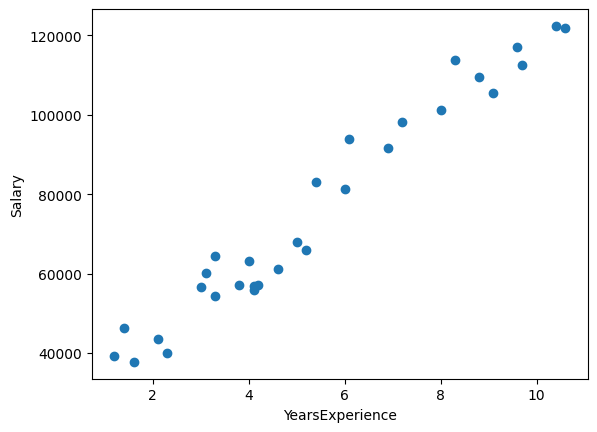

In [439]:
scatter_plot= plt.scatter(SLR_dataset['YearsExperience'],SLR_dataset.Salary)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()
# from the figure we can see there is an increasing order of salaries as the years of experience increases.
# scatter plot is displayed between the years of experience and a continuous target value.

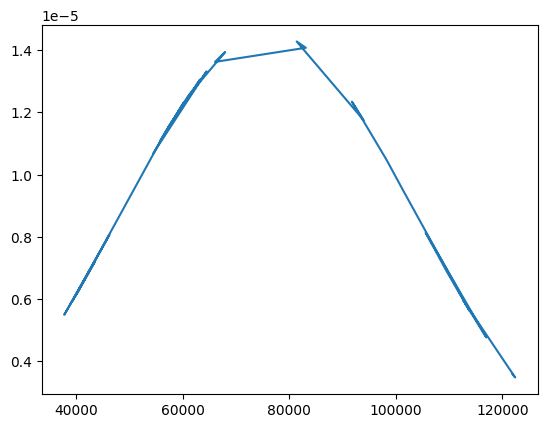

In [440]:
mean = statistics.mean(SLR_dataset['Salary']) #mean of the target data
sd = statistics.stdev(SLR_dataset['Salary'])#standard deviation of the target data
plt.plot(SLR_dataset['Salary'], norm.pdf(SLR_dataset['Salary'], mean, sd))
plt.show()
# displaying plot for normal distribution of the target data as we can see the data is little skewed and mean is at 76004.0 value
# The target data is not normally distriuted

In [415]:
SLR_dataset.info()
#both columns data type is float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [416]:
#splitting the dataset into features and target
SLR_Feature = SLR_dataset['YearsExperience']
SLR_target = SLR_dataset['Salary']

In [417]:
SLR_Feature.head()

0    1.2
1    1.4
2    1.6
3    2.1
4    2.3
Name: YearsExperience, dtype: float64

In [418]:
SLR_Feature=SLR_Feature.to_numpy() #converting the feature column to array using numpy

In [419]:
SLR_target=SLR_target.to_numpy() # converting target column to array using numpy

In [420]:
X_train, X_test,y_train,y_test=train_test_split(SLR_Feature, SLR_target,test_size=0.30) #splitting the data into training and testing

In [421]:
print('training data shape: ', X_train.shape, y_train.shape)

training data shape:  (21,) (21,)


In [422]:
print('testing data shape:', X_test.shape, y_test.shape)

testing data shape: (9,) (9,)


In [423]:
# fit the model on the training data using Linear regression
lr_model = LinearRegression()
lr_model.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))

LinearRegression()

In [424]:
print(lr_model.coef_) #cofficient of the linear model

[[9424.77526259]]


In [425]:
print(lr_model.intercept_) #y-intercept of the linear model

[24147.53059709]


In [426]:
lr_predict= lr_model.predict(X_test.reshape(-1,1)) #predicting the data on X_test

In [427]:
lr_predict

array([[ 53364.33391111],
       [ 73156.36196254],
       [ 55249.28896363],
       [ 92005.91248771],
       [ 80696.18217261],
       [102373.16527656],
       [ 37342.21596471],
       [107085.55290785],
       [ 71271.40691002]])

In [428]:
r2score=r2_score(lr_predict,y_test) # r2_score metrics on the actual and predicted values

In [429]:
print("Traing data score: ",str(round((lr_model.score(X_train.reshape(-1,1),y_train.reshape(-1,1))*100),0))+"%")
print("Testing data score: ",str(round((lr_model.score(X_test.reshape(-1,1),y_test.reshape(-1,1))*100),0))+"%")
print("r2_score between predicted values and orginal values score: ",str(round(r2score*100,0))+'%')
print("mean squared error: ",mean_squared_error(y_test,lr_predict))

Traing data score:  96.0%
Testing data score:  92.0%
r2_score between predicted values and orginal values score:  92.0%
mean squared error:  40363475.77652933


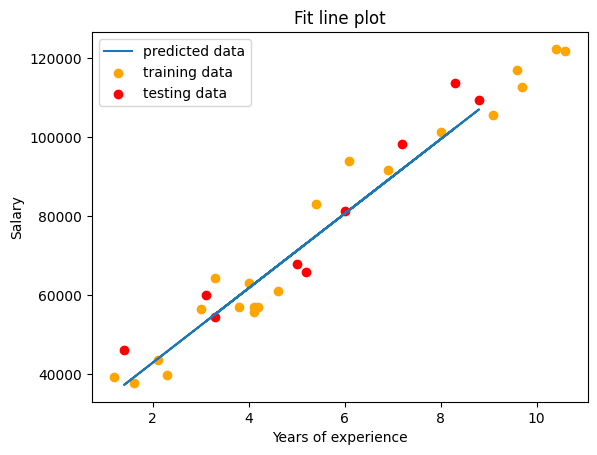

In [442]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(X_test, lr_predict, label='predicted data')
ax.scatter(X_train, y_train, label='training data',color='orange')
ax.scatter(X_test,y_test,label='testing data',color='red')
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.title("Fit line plot")
leg = ax.legend()
plt.show()

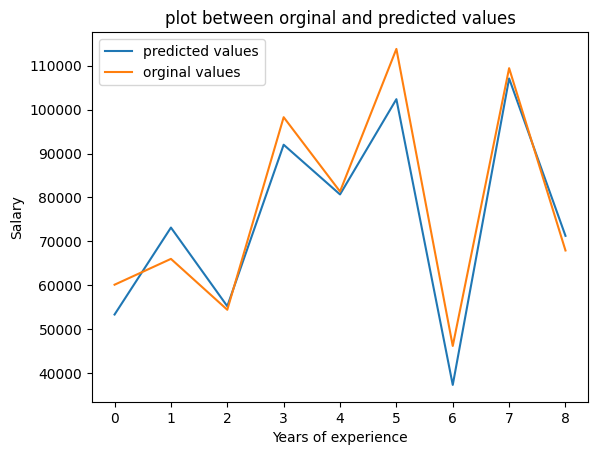

In [431]:
plt.plot(lr_predict)
plt.plot(y_test)
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.title("plot between orginal and predicted values")
plt.legend(['predicted values','orginal values'])
#plot between orignal and predicted values